In [1]:
import xlwings as xw
import os
os.chdir(r'..\..\..')
from gradetools.project_2.run import run_model_assemble_results_in_df
from gradetools.project_2.check import score_accuracy_of_result_df
from gradetools.excel.values import get_range_value
from gradetools.project_2.config import MODEL_RUN_IRRS
from gradetools.project_2.main import full_grade_process

# Run Main

In [11]:
grade_folder = r'E:\Dropbox (Personal)\UF\Teaching\Modeling\Me\repos\fin-model-course\Grading\Project 2\gradebutton'
n_iter = 1000

full_grade_process(grade_folder, n_iter=n_iter)

Skipping babajaniandavid as it already has results
Skipping bahngryan as it already has results
Skipping bloshinskygriffen as it already has results
Skipping buompadrenicolas as it already has results
Skipping dayalajay as it already has results
Skipping dorneyjohn as it already has results
Skipping engjennifer as it already has results
Skipping farnellkaitlyn as it already has results
Skipping henscheljacob as it already has results
Processing hicksmaxon
Took 0:20:07.998306
Processing jagnarinematthew
Took 0:17:39.834181
Processing lendonmurrayjamie
Took 0:17:57.479387
Processing limeijia
Took 0:17:11.708584
Processing mokyan
Took 0:17:19.917675
Processing newmanjonathan
Took 0:17:46.609936
Processing patelkevan
Took 0:17:19.254924
Processing patelshrey
Took 0:17:51.077548
Processing perryscott
Took 0:18:22.289089
Processing pickrencody
Took 0:19:09.461940


# Set up Running on All Students

## Summarize Results

In [41]:
grade_folder = r'E:\Dropbox (Personal)\UF\Teaching\Modeling\Me\repos\fin-model-course\Grading\Project 2\test'
out_path = os.path.join(grade_folder, 'results summary.csv')

out_data = []
for folder in next(os.walk(grade_folder))[1]:
    folder_path = os.path.join(grade_folder, folder)
    in_path = os.path.join(folder_path, 'results.csv')
    df = pd.read_csv(in_path)
    accuracy_pct = df['Valid'].sum() / len(df['Valid'])
    problem_cases = df[df['Valid'] == False].index.tolist()
    out_data.append(
        (folder, accuracy_pct, problem_cases)
    )
full_df = pd.DataFrame(out_data, columns=['Name', 'Accuracy Pct', 'Invalid Cases'])
full_df.to_csv(out_path, index=False)

In [37]:
accuracy_pct = df['Valid'].sum() / len(df['Valid'])
accuracy_pct

0.18181818181818182

In [39]:
problem_cases = df[df['Valid'] == False].index.tolist()

## Run

In [31]:
grade_folder = r'E:\Dropbox (Personal)\UF\Teaching\Modeling\Me\repos\fin-model-course\Grading\Project 2\test'
xlwings_addin_path = r'C:\Users\derobertisna.UFAD\AppData\Roaming\Microsoft\AddIns\xlwings.xlam'
num_iter = 2
tolerance = 0.03

app = xw.App()
xl_app = app.api
xl_app.Workbooks.Open(xlwings_addin_path)

for folder in next(os.walk(grade_folder))[1]:
    folder_path = os.path.join(grade_folder, folder)
    out_path = os.path.join(folder_path, 'results.csv')
    if os.path.exists(out_path):
        print(f'Skipping {folder} as it already has results')
        continue
    print(f'Processing {folder}')
    xl_files = [file for file in next(os.walk(folder_path))[2] if file.lower().endswith('.xlsm')]
    if len(xl_files) > 1:
        raise ValueError(f'found more than one excel file in {folder}: {xl_files}')
    xl_file = xl_files[0]
    xl_path = os.path.join(folder_path, xl_file)
    book = xw.Book(xl_path)
    df = run_model_assemble_results_in_df(num_iter)
    score_accuracy_of_result_df(df, tolerance=tolerance)
    book.close()
    df.to_csv(out_path, index=False)

Skipping babajaniandavid as it already has results
Processing bahngryan
Processing bloshinskygriffen


In [13]:
xl_path = r'E:\Dropbox (Personal)\UF\Teaching\Modeling\Me\repos\fin-model-course\Grading\Project 2\test\babajaniandavid\project2.xlsm'

In [28]:
from pywintypes import com_error

app = xw.App()
xl_app = app.api
xl_app.Workbooks.Open(r'C:\Users\derobertisna.UFAD\AppData\Roaming\Microsoft\AddIns\xlwings.xlam')

book = xw.Book(xl_path)


# for i in range(1, xl_app.AddIns.Count + 1):
#     addin = xl_app.AddIns(i)
#     try:
#         print(addin.FullName)
#     except com_error:
#         pass
#     addin_path = addin.FullName
#     if addin.Installed and '.xll' not in addin_path.lower():
#         xl_app.Workbooks.Open(addin_path)

In [29]:
book.close()

In [27]:
df = run_model_assemble_results_in_df(2)
score_accuracy_of_result_df(df, tolerance=0.03)
df

,Interest Rate,Initial Default Probability,IRR,Price Machine,Loan Life,Decay Default,Final Default,Recovery,Count,Iter Count,Valid
0,0.20,0.2,-0.107515,1000000,5,0.9,0.4,0.4,2,2,False
1,0.20,0.2,-0.267466,2000000,10,0.8,0.5,0.3,2,2,False
2,0.20,0.3,-0.074798,1000000,5,0.9,0.4,0.4,2,2,True
3,0.20,0.3,-0.218379,2000000,10,0.8,0.5,0.3,2,2,False
4,0.22,0.2,-0.097455,1000000,5,0.9,0.4,0.4,2,2,False
5,0.22,0.2,-0.119334,2000000,10,0.8,0.5,0.3,2,2,False
6,0.22,0.3,0.129061,1000000,5,0.9,0.4,0.4,2,2,False
7,0.22,0.3,0.212014,2000000,10,0.8,0.5,0.3,2,2,False
8,0.24,0.2,-0.027462,1000000,5,0.9,0.4,0.4,2,2,True
9,0.24,0.2,0.020170,2000000,10,0.8,0.5,0.3,2,2,True


In [ ]:
import os

os.system('taskkill /IM EXCEL.exe /F')

# IRR Average, Range

In [5]:
import pandas as pd
irr_df = pd.DataFrame(MODEL_RUN_IRRS).T

In [6]:
irr_df.head()

,0,1,2
0,-0.029525,-0.028525,-0.021638
1,-0.039198,-0.034631,-0.045146
2,-0.075608,-0.087634,-0.077602
3,-0.099183,-0.104346,-0.105048
4,-0.014029,-0.005785,-0.005212


In [9]:
irr_df.max(axis=1) - irr_df.min(axis=1)

0     0.007888
1     0.010515
2     0.012026
3     0.005865
4     0.008818
5     0.014029
6     0.012539
7     0.016133
8     0.009796
9     0.006066
10    0.012817
11    0.013517
12    0.006762
13    0.020215
14    0.016105
15    0.015992
16    0.015434
17    0.010245
18    0.027449
19    0.013130
20    0.009494
21    0.008230
22    0.007772
23    0.013014
24    0.001317
25    0.008245
26    0.015339
27    0.006936
28    0.006193
29    0.020201
30    0.007718
31    0.013356
32    0.013553
33    0.014252
34    0.002391
35    0.006827
36    0.007503
37    0.019720
38    0.007974
39    0.010619
40    0.010264
41    0.019017
42    0.003292
43    0.006388
dtype: float64

In [10]:
irr_df.mean(axis=1).tolist()

[-0.026562584346311913,
 -0.03965823517287694,
 -0.08028122008069534,
 -0.10285886576529037,
 -0.008341953953891265,
 -0.018723594613946046,
 -0.0666535536682143,
 -0.0851364026486774,
 0.002484345968608853,
 -0.0008172264820961255,
 -0.048946699890895985,
 -0.07287286364415017,
 0.01982208440778643,
 0.012023344042589132,
 -0.04507473533154282,
 -0.0641750477431934,
 0.03476763705155911,
 0.023827519372196893,
 -0.032211093330416114,
 -0.052373596003910505,
 0.048642352777568655,
 0.04047331453321998,
 -0.02560679775085431,
 -0.04226422097370832,
 0.05954429206615802,
 0.05306439342675275,
 -0.009321935950876476,
 -0.03300117782709114,
 0.077623351690932,
 0.06794239914147909,
 -0.007085511201136573,
 -0.019666251135512777,
 0.09185364208202677,
 0.08467760659821284,
 0.013850036409500563,
 0.00227548148762665,
 0.08722351606834167,
 0.0905722218341541,
 0.02174545237277557,
 0.005534553590924469,
 0.12123851561076804,
 0.10865956885099019,
 0.027655687383082484,
 0.021234907247556844

# Run Model

In [2]:
%%time
df = run_model_assemble_results_in_df(1000)
score_accuracy_of_result_df(df, tolerance=0.03)
df

Wall time: 4h 10min 5s


In [3]:
%%time
df2 = run_model_assemble_results_in_df(1000)
score_accuracy_of_result_df(df2, tolerance=0.03)

Wall time: 4h 38min 24s


In [4]:
df.IRR.tolist()

[-0.029525162316033523,
 -0.039198423942945704,
 -0.07560750643719956,
 -0.09918284439267079,
 -0.0140292855134064,
 -0.021642239990858583,
 -0.06736482316695064,
 -0.07815645546805484,
 0.007182255592430586,
 -0.0014004054647470778,
 -0.04718988059600864,
 -0.07349481332224003,
 0.01951964113696681,
 0.009900519823698802,
 -0.04560800133045216,
 -0.061688285867125804,
 0.03821592972591422,
 0.0303320281214313,
 -0.0412272927642443,
 -0.049645770212734364,
 0.04845900985333295,
 0.03619111871266041,
 -0.03044279179654697,
 -0.03433693112619739,
 0.06019925756269191,
 0.056888328829915485,
 -0.00170857315549548,
 -0.03573045835826544,
 0.07803824324325251,
 0.057476079564897226,
 -0.004846972059819942,
 -0.018046871230067294,
 0.09779639429370446,
 0.07719638985984639,
 0.013771524603046655,
 -0.0022231578589723983,
 0.08867263241325098,
 0.08138044351619418,
 0.02393813879508009,
 -5.786102298396323e-05,
 0.11960981095983676,
 0.10719289069227975,
 0.027947170011640377,
 0.017835233254

In [5]:
df2.IRR.tolist()

[-0.028524955170080007,
 -0.034630677380685905,
 -0.08763381563528605,
 -0.10434559390262081,
 -0.0057850233633725155,
 -0.02427864814830588,
 -0.07256757575936419,
 -0.09428946656671257,
 0.002884308145834515,
 -0.0035584659166211547,
 -0.04341648221310988,
 -0.0658031416599863,
 0.016592528584482912,
 0.0231925031911509,
 -0.036755686799171405,
 -0.057422283891372404,
 0.040760549679229124,
 0.02008658546681122,
 -0.013978576536600814,
 -0.06030226533967865,
 0.05348121333916176,
 0.04442124545452481,
 -0.02370683838041821,
 -0.04510462131439562,
 0.05955122157920794,
 0.0486431805104484,
 -0.009209823306834562,
 -0.028794076022341873,
 0.07431963885504096,
 0.07767713454248995,
 -0.004345591229285701,
 -0.02715389481320822,
 0.09352140866744355,
 0.08538774537113265,
 0.01508494663056717,
 0.004603628903269794,
 0.09025052606970219,
 0.10110008803629751,
 0.01666230539500821,
 0.0061008266442531545,
 0.11692087661617163,
 0.1189016277735356,
 0.025864051392678833,
 0.024223598032287

In [3]:
df

,Interest Rate,Initial Default Probability,IRR,Price Machine,Loan Life,Decay Default,Final Default,Recovery,Count,Iter Count,Valid
0,0.20,0.2,-0.021638,1000000,5,0.9,0.4,0.4,1000,1000,False
1,0.20,0.2,-0.045146,2000000,10,0.8,0.5,0.3,1000,1000,False
2,0.20,0.3,-0.077602,1000000,5,0.9,0.4,0.4,1000,1000,False
3,0.20,0.3,-0.105048,2000000,10,0.8,0.5,0.3,1000,1000,False
4,0.22,0.2,-0.005212,1000000,5,0.9,0.4,0.4,1000,1000,True
5,0.22,0.2,-0.010250,2000000,10,0.8,0.5,0.3,1000,1000,False
6,0.22,0.3,-0.060028,1000000,5,0.9,0.4,0.4,1000,1000,False
7,0.22,0.3,-0.082963,2000000,10,0.8,0.5,0.3,1000,1000,False
8,0.24,0.2,-0.002614,1000000,5,0.9,0.4,0.4,1000,1000,True
9,0.24,0.2,0.002507,2000000,10,0.8,0.5,0.3,1000,1000,False


In [3]:
df

,Interest Rate,Initial Default Probability,IRR,Price Machine,Loan Life,Decay Default,Final Default,Recovery,Count,Iter Count,Valid
0,0.20,0.2,0.083468,1000000,5,0.9,0.4,0.4,3,3,False
1,0.20,0.2,0.122329,2000000,10,0.8,0.5,0.3,3,3,False
2,0.20,0.3,-0.042512,1000000,5,0.9,0.4,0.4,3,3,False
3,0.20,0.3,-0.057381,2000000,10,0.8,0.5,0.3,3,3,False
4,0.22,0.2,-0.062219,1000000,5,0.9,0.4,0.4,3,3,False
5,0.22,0.2,-0.008311,2000000,10,0.8,0.5,0.3,3,3,False
6,0.22,0.3,-0.082624,1000000,5,0.9,0.4,0.4,3,3,False
7,0.22,0.3,-0.046194,2000000,10,0.8,0.5,0.3,3,3,False
8,0.24,0.2,0.045985,1000000,5,0.9,0.4,0.4,3,3,False
9,0.24,0.2,-0.127525,2000000,10,0.8,0.5,0.3,3,3,False


In [4]:
df.IRR.tolist()

[0.19999999999999996,
 -0.25577497195827964,
 -0.22532766305571375,
 -0.2043652506041368,
 -0.03179918915121752,
 -0.07822654631822801,
 -0.22328377632297727,
 0.035832783747583585,
 0.009635196573109628,
 -0.030105191078306337,
 0.07226876657602566,
 -0.15080674872973984,
 0.018693572315767886,
 -0.14120258967037122,
 -0.17494903317028376,
 -0.11503850465233907,
 0.09893543324268066,
 0.017004968844032575,
 -0.21690086100751685,
 -0.03874086691610675,
 -0.048709995478090885,
 0.03448250874671525,
 0.2297373643059808,
 0.10194526077679478,
 -0.018028305458298848,
 -0.22011839597308883,
 -0.04695293506964741,
 -0.05320763312301724,
 0.26929263769380074,
 -0.1015246444630075,
 0.044018244885102385,
 0.013974558167786996,
 0.31290766697822137,
 0.1522468999473536,
 -0.26319370027192257,
 -0.1513626624928328,
 -0.15607568139545216,
 -0.1707986746492951,
 0.24110267561815002,
 -0.08111194418648963,
 0.19374875976323766,
 0.2602250338022279,
 0.03296432940106123,
 0.031186497356636367]

In [3]:
df

,Interest Rate,Initial Default Probability,IRR,Price Machine,Loan Life,Decay Default,Final Default,Recovery,Count,Iter Count
0,0.20,0.2,0.200000,1000000,5,0.9,0.4,0.4,3,3
1,0.20,0.2,-0.255775,2000000,10,0.8,0.5,0.3,3,3
2,0.20,0.3,-0.225328,1000000,5,0.9,0.4,0.4,3,3
3,0.20,0.3,-0.204365,2000000,10,0.8,0.5,0.3,3,3
4,0.22,0.2,-0.031799,1000000,5,0.9,0.4,0.4,3,3
5,0.22,0.2,-0.078227,2000000,10,0.8,0.5,0.3,3,3
6,0.22,0.3,-0.223284,1000000,5,0.9,0.4,0.4,3,3
7,0.22,0.3,0.035833,2000000,10,0.8,0.5,0.3,3,3
8,0.24,0.2,0.009635,1000000,5,0.9,0.4,0.4,3,3
9,0.24,0.2,-0.030105,2000000,10,0.8,0.5,0.3,3,3


In [4]:
df

,Interest Rate,Initial Default Probability,IRR,Count
0,0.20,0.2,-0.019678,100
1,0.20,0.3,-0.075025,100
2,0.22,0.2,-0.036504,100
3,0.22,0.3,-0.052169,100
4,0.24,0.2,-0.013050,100
5,0.24,0.3,-0.071609,100
6,0.26,0.2,0.025264,100
7,0.26,0.3,-0.057307,100
8,0.28,0.2,0.043704,100
9,0.28,0.3,-0.021168,100


In [3]:
df

,Interest Rate,Initial Default Probability,IRR,Count
0,0.20,0.2,2.0,100
1,0.20,0.3,2.0,100
2,0.22,0.2,2.0,100
3,0.22,0.3,2.0,51
4,0.24,0.2,2.0,100
5,0.24,0.3,2.0,33
6,0.26,0.2,2.0,83
7,0.26,0.3,2.0,30
8,0.28,0.2,2.0,1
9,0.28,0.3,2.0,16


In [2]:
wb = xw.books.active

In [3]:
run_trials = wb.macro('RunWorkbookCollectOutputs')

In [4]:
run_trials()

In [5]:
ws = wb.sheets['Trials']

In [7]:
ws.range('A:A').clear()

In [2]:
app = list(xw.apps)[0]

In [5]:
app = list(xw.apps)[0]
app.api.CalculateFull()

In [8]:
app = list(xw.apps)[0]
[app.api.CalculateFull() for i in range(100)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
app = list(xw.apps)[0]
values = []
for i in range(100):
    app.api.CalculateFull()
    value = get_range_value('B15')
    values.append(value)
values

[-0.14959558862329614,
 -0.26319370027192257,
 2.220446049250313e-16,
 -0.26319370027192257,
 -0.26319370027192257,
 None,
 2.220446049250313e-16,
 -0.26319370027192257,
 -0.06434191116630905,
 0.04816446575491162,
 -0.14959558862329614,
 -0.14959558862329614,
 -0.14959558862329614,
 -0.06434191116630905,
 -0.26319370027192257,
 -0.14959558862329614,
 -0.14959558862329614,
 -0.26319370027192257,
 -0.26319370027192257,
 -0.06434191116630905,
 -0.14959558862329614,
 -0.26319370027192257,
 -0.14959558862329614,
 -0.14959558862329614,
 -0.26319370027192257,
 0.04816446575491162,
 None,
 -0.26319370027192257,
 0.04816446575491162,
 -0.14959558862329614,
 0.19999999999999996,
 -0.26319370027192257,
 -0.26319370027192257,
 0.04816446575491162,
 0.04816446575491162,
 None,
 0.19999999999999996,
 -0.26319370027192257,
 -0.26319370027192257,
 None,
 0.19999999999999996,
 -0.14959558862329614,
 -0.14959558862329614,
 -0.26319370027192257,
 0.04816446575491162,
 0.04816446575491162,
 0.04816446575

In [6]:
value

-0.06434191116630905

In [2]:
import os

os.system('taskkill /IM EXCEL.exe /F')

0

In [125]:
os.chdir('..')

In [5]:
os.chdir(r'E:\Dropbox (Personal)\UF\Teaching\Modeling\Me\repos\fin-model-course\Grading\Project 2\bloshinskygriffen')

In [2]:
n_iter = 3

In [3]:
from pythoncom import com_error
import time

In [4]:
from typing import List

def calculate_app_extract_irrs(n_iter: int = 3, out_cell: str = 'B15') -> List[float]:

    app = list(xw.apps)[0]
    values = []
    for i in range(n_iter):
        try:
            time.sleep(.5)
            app.api.CalculateFull()
            values.append(xw.Range('B15').value)
        except com_error:
            continue
    return values

In [11]:
def get_range_value(cell: str, retries=10):
    while True:
        if retries < 0:
            raise ValueError(f'could not get value for {cell} after retrying')
        try:
            return xw.Range(cell).value
        except com_error:
            retries -= 1
            time.sleep(.1)
    
def set_range_value(value, cell: str, retries=10):
    while True:
        if retries < 0:
            raise ValueError(f'could not set value for {cell} after retrying')
        try:
            xw.Range(cell).value = value
            return
        except com_error:
            retries -= 1
            time.sleep(.1)

In [10]:
def set_inputs(p_machine: int = 1000000, loan_life: int = 5, init_default: float = 0.3,
              decay_prob: float = 0.9, final_default: float = 0.4, recovery: float = 0.4,
              interest_rate: float = 0.2):
    input_cell_dict = {
        'B2': p_machine,
        'B3': loan_life,
        'B4': init_default,
        'B5': decay_prob,
        'B6': final_default,
        'B7': recovery,
        'B8': interest_rate
    }
    for cell, inp in input_cell_dict.items():
        set_range_value(inp, cell)
        
set_inputs(init_default=0.2, interest_rate=0.2)

trying to set 1000000 to B2 with 10 remaining
trying to set 5 to B3 with 10 remaining
trying to set 0.2 to B4 with 10 remaining
trying to set 0.9 to B5 with 10 remaining
trying to set 0.4 to B6 with 10 remaining
trying to set 0.4 to B7 with 10 remaining
trying to set 0.2 to B8 with 10 remaining


In [15]:
[i/100 for i in range(20, 41, 2)]

[0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4]

In [13]:
import itertools
import pandas as pd
n_iter = 3
interest_rates = [0.2, 0.22]
init_default_probs = [0.2, 0.3]

all_values = []
for interest_rate, init_default in itertools.product(interest_rates, init_default_probs):
    set_inputs(init_default=init_default, interest_rate=interest_rate)
    values = calculate_app_extract_irrs(n_iter)
    all_values.append((interest_rate, init_default, sum(values)/len(values)))

df = pd.DataFrame(all_values, columns=['Interest Rate', 'Initial Default Probability', 'IRR'])
df

,Interest Rate,Initial Default Probability,IRR
0,0.20,0.2,-0.159408
1,0.20,0.3,0.058177
2,0.22,0.2,-0.096353
3,0.22,0.3,-0.042209


In [132]:
values = calculate_app_extract_irrs()

In [133]:
len(values)

2

In [134]:
values

[-0.26319370027192257, 0.04816446575491162]

In [23]:
import pandas as pd

In [24]:
df = pd.DataFrame()
df['Values'] = values
df['Values'].mean()

-0.013060698145934151

In [16]:
%matplotlib inline

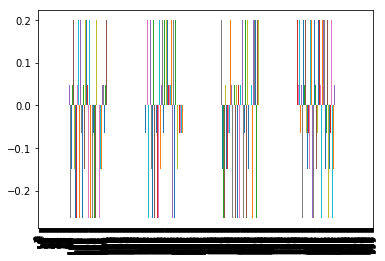

In [17]:
df['Values'].plot.bar()

In [25]:
df['Values'].value_counts()

 2.000000e-01    289
-2.631937e-01    196
 4.816447e-02    186
-1.495956e-01    144
-6.434191e-02    104
 2.220446e-16     81
Name: Values, dtype: int64

In [26]:
df['Values'].apply(lambda x: f'{x:.2%}').value_counts() / len(df)

20.00%     0.289
-26.32%    0.196
4.82%      0.186
-14.96%    0.144
-6.43%     0.104
0.00%      0.081
Name: Values, dtype: float64

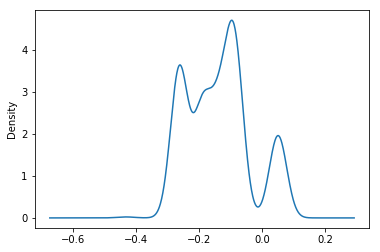

In [13]:
df['Values'].plot.kde()

In [30]:
values

[0.050000000000017364,
 0.050000000000017364,
 -0.26319370027192257,
 -0.14456502662189985,
 -0.19192829299781855,
 -0.26319370027192257,
 -0.19192829299781855]

In [22]:
xw.Range('B11').value

-0.14456502662189985

In [27]:
for i in range(5):
    print(i)

0
1
2
3
4


In [30]:
for something in range(5):
    print(something +1)

1
2
3
4
5
